## PetFinder

* Nesta competição foi desenvolvolvido algoritmos para prever a adoção de animais de estimação - especificamente, com que rapidez um animal de estimação é adotado?.

## Etapa1

* Entendimento do negócio

Milhões de animais vadios sofrem nas ruas ou são sacrificados em abrigos todos os dias em todo o mundo. Se for possível encontrar um lar para eles, muitas vidas preciosas poderão ser salvas — e mais famílias felizes poderão ser criadas.

PetFinder.my é a principal plataforma de bem-estar animal da Malásia desde 2008, com um banco de dados de mais de 150.000 animais. PetFinder colabora estreitamente com amantes de animais, mídia, corporações e organizações globais para melhorar o bem-estar animal.

As taxas de adoção de animais estão fortemente correlacionadas com os metadados associados aos seus perfis online, como textos descritivos e características das fotos. Por exemplo, o PetFinder está atualmente experimentando uma ferramenta simples de IA chamada Cuteness Meter, que classifica o quão fofo um animal de estimação é com base nas qualidades presentes em suas fotos.

## Etapa 2



In [7]:
import pandas as pd
import ydata_profiling
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

In [8]:
train = pd.read_csv('./petfinder-adoption-prediction/train/train.csv')

test = pd.read_csv('./petfinder-adoption-prediction/test/test.csv')

train.head(5)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

* Dicionário dos dados

| Variável | Definição | Tipo de variável |
|---|---|---|
| PetId | id de hash esclusido do perfil pet | quantitativa discreta |
| AdoptionSpeed | velocidade categorica de adoção. Quanto mais baixo mais rapido (alvo) | qualitatitiva ordinal |
| Type | tipo de animal (cachorro = 1, gato = 2 )| qualitativa nominal |
| Name | nome do pet (se vazio por que não tem nome) | qualitativa nominal |
| Age | idade no pet quando listatados, em meses | quantitativa discreta |
| Breed1 | raça primaria do pet | qualitativa nominal |
| Breed1 | raça secundária do pet, é pet de raça mista | qualitativa nominal |
| Gender | genero do pet (1= macho, 2= femea, 3= misto, se o perfil representar um grupo de pets) | qualitativa nominal |
| Color1 | cor primaria do pet | |
| Color2 | cor secundária do pet | |
| Color3 | cor terciária do pet | |
| MaturitySize | tamanho na maturidade (1=pequeno, 2=médio, 3=grande, 4=extragrande, 0 não especificado) | qualitativa ordinal |
| FurLength | comprimento do pelo (1=curto, 2=médio, 3=longo, 0=não especificado) | qualitativa ordinal |
| Vaccinated | animal de estimação foi vacinado (1 = sim, 2 = não, 3 não tenho certeza) | qualitativa nominal |
| Dewormed | pet foi desparasitado (1=sim, 2=não, 3= não tem certeza) | qualitativa nominal |
| Sterilized | animal de estimação foi esterilizado/castrado (1 = sim, 2 = não, 3 = não tenho certeza) | qualitativa nominal |
| Health | condição de saúde (1 = saudável, 2 = lesão leve, 3 = lesão grave, 0 não especificado) | |
| Quantity | numero de pets representados no perfil | quantitativa discreta |
| Fee | taxa de adoção (0 = taxa) | |
| State | localização do estado na Malásia (consulte o dicionário de rótulos estaduais) | |
| RescuerID | ID de hash exclusivo de resgate | quantitativa discreta |
| VideosAmt | total de videos enviados para este pet | quantitativa discreta |
| PhotoAmt | total de fotos enviados para este pet | quantitativa discreta |
| Description | Redação do perfil deste animal de estimação | |

**Velocidade de adoção**
* Os competidores são obrigados a prever esse valor. O valor é determinado pela rapidez com que um animal de estimação é adotado, se é que é adotado. Os valores são determinados da seguinte forma:

0. - O animal foi adotado no mesmo dia em que foi listado.
1. - Animal de estimação foi adotado entre 1 e 7 dias (1ª semana) após ser listado.
2. - O animal foi adotado entre 8 e 30 dias (1º mês) após ser listado.
3. - O animal foi adotado entre 31 e 90 dias (2º e 3º mês) após ser listado.
4. - Não há adoção após 100 dias de listagem. (Não há animais de estimação neste conjunto de dados que esperaram entre 90 e 100 dias).


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

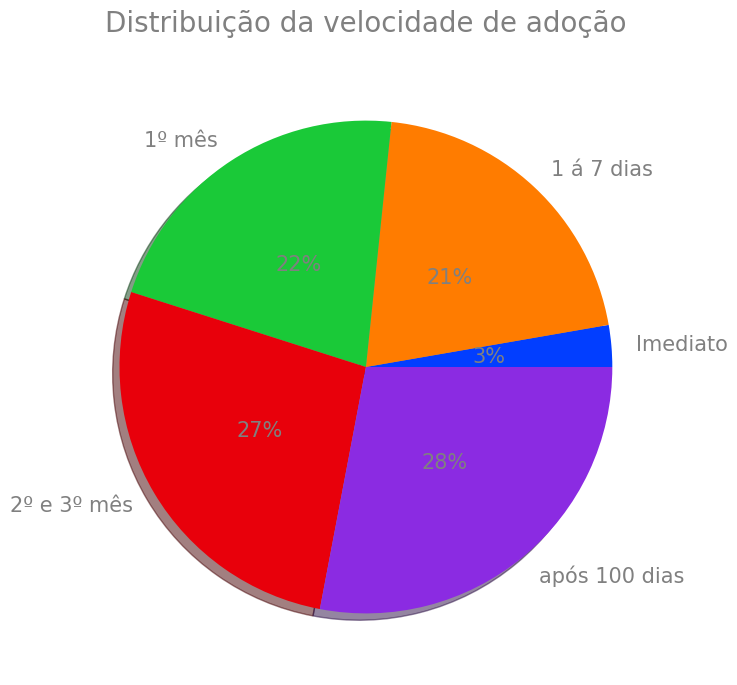

In [34]:
# definindo os dados que aparecerão no gráfico

valores = list(train['AdoptionSpeed'].value_counts(ascending=True))

labelss = ['Imediato', "1 á 7 dias", "1º mês", "2º e 3º mês", "após 100 dias"]

colors = sns.color_palette('bright', n_colors=5)

plt.figure(figsize=(10,8))

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'gray'
plt.rcParams['axes.labelcolor']= 'gray'
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'
plt.rcParams['font.size']=15

plt.pie(valores, 
       labels=labelss,
       colors = colors,
       autopct='%1.0f%%',
       shadow=True, 
       startangle=0,   
       pctdistance=0.5,
       labeldistance=1.1
    )

plt.title("Distribuição da velocidade de adoção", fontsize=20, pad=20)

plt.show()

In [ ]:
train.groupby()